In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

train_scores = pd.read_csv('train_scores.csv')

In [5]:
all_files = os.listdir('yolo/datasets/tiled_prune_bg_050725/train')
jpg_files = [f for f in all_files if f.lower().endswith('.jpg')]
txt_basenames = {os.path.splitext(f)[0] for f in all_files if f.lower().endswith('.txt')}
bg_filenames = [f for f in jpg_files if os.path.splitext(f)[0] not in txt_basenames]
bg_train_scores = train_scores[train_scores['file'].isin(bg_filenames)]


In [31]:
tp_filenames = [f for f in jpg_files if os.path.splitext(f)[0] in txt_basenames]
len(tp_filenames)

5364

In [7]:
bg_train_scores = bg_train_scores.loc[bg_train_scores.groupby('file')['conf'].idxmax()]


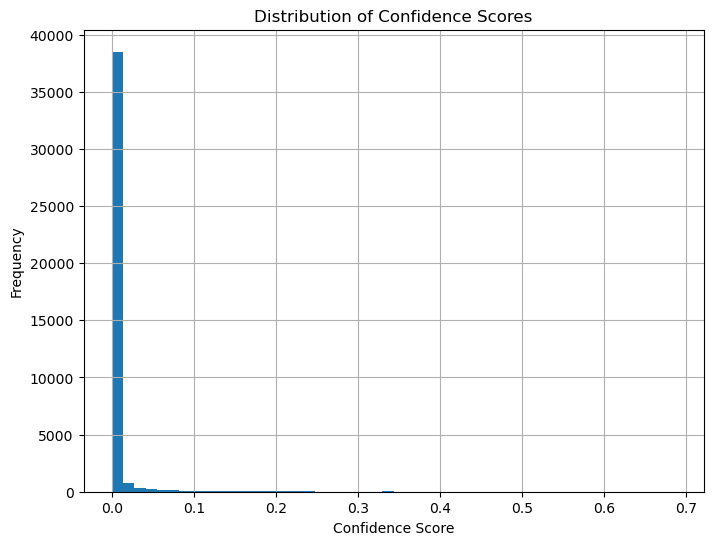

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(bg_train_scores['conf'], bins=50, edgecolor=None)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
len(all_files) - len(jpg_files)

5364

In [43]:
keep_bg = bg_train_scores[bg_train_scores['conf'] >= 0.003]
len(keep_bg)

5283

In [26]:
keep_bg['file'].to_csv('keep_train_bgs.txt', index=False, header=False)

In [ ]:
keep_bg_filenames = keep_bg['file']


5592900      0001_t2_fs_20220912_1.jpg
1878600     0001_t2_fs_20220912_10.jpg
366300      0001_t2_fs_20220912_11.jpg
12450600    0001_t2_fs_20220912_12.jpg
6268200      0001_t2_fs_20220912_6.jpg
                       ...            
9005400     pi9_20240817_151916_14.jpg
7671300      pi9_20240817_151916_5.jpg
4167900     pi9_20240817_153543_13.jpg
7312800      pi9_20240817_153543_5.jpg
2948400      pi9_20240817_192334_9.jpg
Name: file, Length: 5283, dtype: object

In [ ]:
# image_dir = 'yolo/datasets/tiled_balance_bg_052025/train'


# all_jpgs = [f for f in os.listdir(image_dir) if f.lower().endswith('.jpg')]

# for jpg in all_jpgs:
#     base_name = os.path.splitext(jpg)[0]
#     jpg_path = os.path.join(image_dir, jpg)
#     txt_path = os.path.join(image_dir, base_name + '.txt')

#     has_txt = os.path.exists(txt_path)

#     if not has_txt and jpg not in keep_bg_filenames:
#         os.remove(jpg_path)
#     elif jpg in keep_bg_filenames and has_txt:
#         print(f"Warning: {jpg} has an unexpected .txt pair.")


In [47]:
src_dir = 'yolo/datasets/tiled_prune_bg_050725/train'
dst_dir = 'yolo/datasets/tiled_balance_bg_052025/train'

for filename in tp_filenames:
    src_img = os.path.join(src_dir, filename)
    src_txt = os.path.join(src_dir, os.path.splitext(filename)[0] + '.txt')

    dst_img = os.path.join(dst_dir, filename)
    dst_txt = os.path.join(dst_dir, os.path.splitext(filename)[0] + '.txt')

    if os.path.exists(src_img):
        shutil.copy2(src_img, dst_img)
    else:
        print(f"Image file not found: {src_img}")

    if os.path.exists(src_txt):
        # print('bg {filename} has txt file')
        shutil.copy2(src_txt, dst_txt)
    else:
        print(f"Warning: No .txt file for {filename}")

In [48]:
import os
import shutil

src_dir = 'yolo/datasets/tiled_prune_bg_050725/val'
dst_dir = 'yolo/datasets/val_tps'

os.makedirs(dst_dir, exist_ok=True)
for file in os.listdir(src_dir):
    if file.lower().endswith('.jpg'):
        base_name = os.path.splitext(file)[0]
        jpg_path = os.path.join(src_dir, file)
        txt_path = os.path.join(src_dir, base_name + '.txt')

        if os.path.exists(txt_path):
            shutil.copy2(jpg_path, os.path.join(dst_dir, file))
            shutil.copy2(txt_path, os.path.join(dst_dir, base_name + '.txt'))


## DUPLICATE HARD NEGS

In [49]:
from pathlib import Path

csv_path = 'hard_negs.csv'
image_dir = Path('yolo/datasets/tiled_balance_bg_052025/train')

df = pd.read_csv(csv_path)

for filename in df['file']:
    src_path = image_dir / filename
    if src_path.exists():
        base, ext = os.path.splitext(filename)
        dst_filename = f"{base}_2{ext}"
        dst_path = image_dir / dst_filename
        shutil.copy2(src_path, dst_path)
    else:
        print(f"File not found: {src_path}")